# First Project 

1. Library and Setting

In [2]:
import PublicDataReader as pdr
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [58]:
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

2. EDA

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Pclass'>

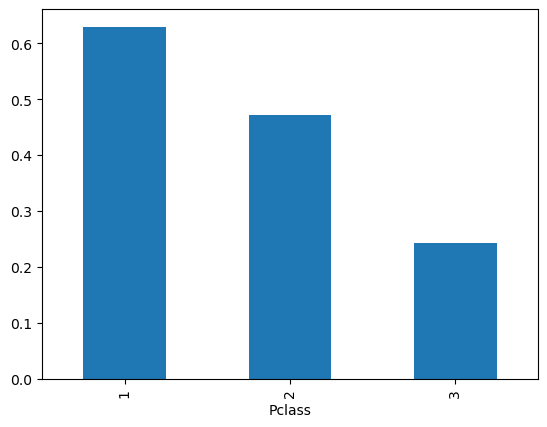

In [8]:
train.groupby('Sex').mean()
train.groupby('Pclass').mean()
train.groupby('Pclass').mean()['Survived'].plot(kind='bar')


Relation between datas

<AxesSubplot:xlabel='Age', ylabel='Fare'>

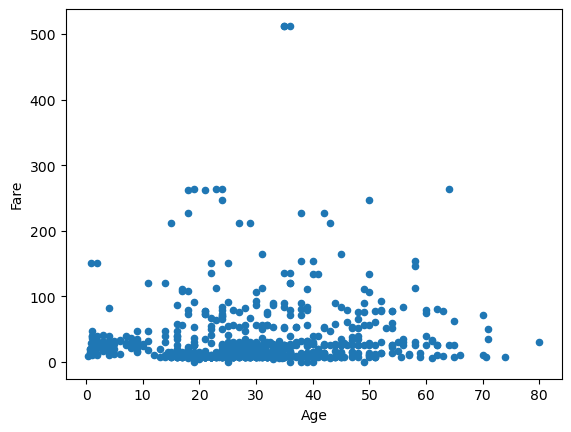

In [9]:
train.plot(x='Age',y='Fare',kind='scatter')

Data type Check

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [59]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna("S")
train["Sex"] = train["Sex"].map({"male":0, "female":1})
test["Sex"] = test["Sex"].map({"male":0, "female":1})


In [60]:
X_train  = train[['Sex', 'Pclass']]
X_test  = test[['Sex', 'Pclass']]
y_train  = train['Survived']

Modeling

In [61]:
lr= LogisticRegression()
lr.fit(X_train, y_train)
prob_pre = lr.predict_proba(X_test)[:,1]

In [63]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
prob_dt = dt.predict_proba(X_test)[:,1]


# Project 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [10]:
pd.set_option('display.max_columns', 500)
pre = pd.DataFrame(pd.read_csv("Pre_Season_Batter.csv"))
regular_day = pd.DataFrame(pd.read_csv("Regular_Season_Batter_Day_by_Day_b4.csv"))
regular = pd.DataFrame(pd.read_csv("Regular_Season_Batter.csv"))

1. EDA

In [4]:
regular.columns
regular['batter_name'].nunique()

regular.loc[regular['SB']==84,:]

,batter_name,year,AB,avg,H,2B,3B,SB,HR,position,OPS
1322,이종범,1994,499,0.393,196,27,5,84,19,NaN,1.036198


In [5]:
regular.describe()

,year,AB,avg,H,2B,3B,SB,HR,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000
mean,2011.614507,201.514670,0.237559,55.988183,9.863488,0.957620,5.290139,5.504075,0.649939
std,4.992833,169.537029,0.098440,52.253844,9.871314,1.647193,9.088580,7.989380,0.261634
min,1993.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,38.250000,0.203000,8.000000,1.000000,0.000000,0.000000,0.000000,0.546000
50%,2013.000000,163.000000,0.255000,40.000000,7.000000,0.000000,2.000000,2.000000,0.688637
75%,2016.000000,357.500000,0.291000,100.000000,16.000000,1.000000,6.000000,8.000000,0.797234
max,2018.000000,600.000000,1.000000,201.000000,47.000000,17.000000,84.000000,53.000000,4.000000


c:\Users\Popperkim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='3B', ylabel='Density'>

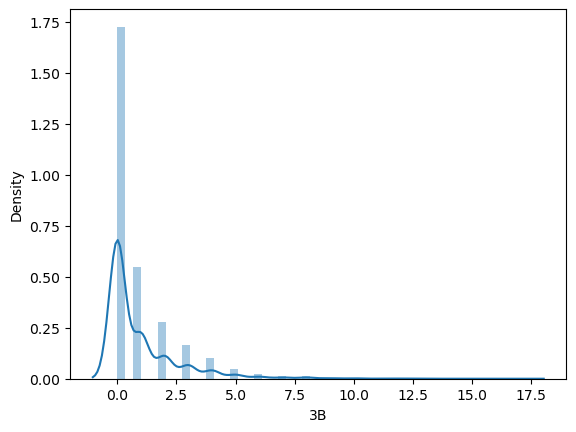

In [19]:
sb.distplot(regular['3B'])

Text(0, 0.5, '3B')

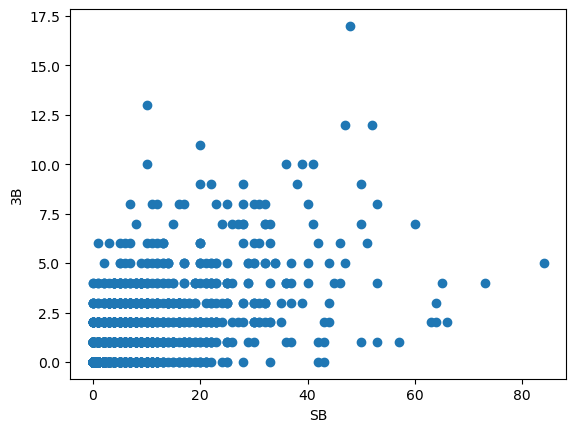

In [31]:
%matplotlib inline
plt.scatter(regular['SB'],regular['3B'])
plt.xlabel('SB')
plt.ylabel('3B')

Text(0, 0.5, 'OPS')

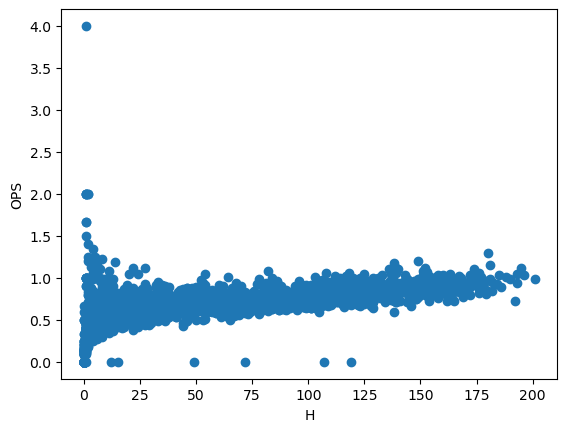

In [32]:
plt.scatter(regular['H'],regular['OPS'])
plt.xlabel('H')
plt.ylabel('OPS')

In [13]:
regular.groupby(['position'])[['AB', 'OPS']].mean()

,AB,OPS
position,,
내야수(우투양타),25.142857,0.275000
내야수(우투우타),229.539658,0.674866
내야수(우투좌타),183.092199,0.642086
내야수(좌투좌타),271.027778,0.748972
외야수(우투양타),169.571429,0.697714
외야수(우투우타),205.665217,0.665179
외야수(우투좌타),250.141304,0.685956
외야수(좌투좌타),259.388060,0.656005
포수(우투우타),142.417989,0.613227


2. 데이터 잘라내기

In [9]:
ops_king = regular.loc[regular["OPS"]>0.9,:]["batter_name"].unique()
for i in ops_king :
    print(regular.loc[regular["batter_name"]==i]["OPS"].mean())
regular.columns

0.902
0.7597333333333334
0.6446486591777418
0.7633809966284072
1.0483333333333331
0.6694658120155738
0.6444898261665719
0.93825
0.8464714743473788
0.9006666666666666
0.741
0.7201987380725924
0.625
0.6128333333333333
0.8989901037609803
0.7374
0.7163636363636363
0.5356
0.7467
0.7333000000000001
0.733
0.756
0.9830226971340719
1.0
0.73
0.9513750000000001
0.7961818181818181
0.6213333333333334
0.8157272727272727
0.9068333333333333
0.6867857142857143
0.8686363636363638
0.9944999999999999
0.9495
1.0203059561240606
0.9445
0.9046
0.7525714285714286
0.730857142857143
0.8014999999999999
0.8752000000000001
0.8494615384615384
0.8235294117647056
0.7523846153846154
0.67225
0.7553333333333333
0.6925714285714285
0.897
1.122
0.71
0.8250833333333332
0.7534545454545456
0.8154307132908365
0.9115
0.5332151087966126
0.7782222222222223
0.7609
0.6946363636363636
0.6780920960321738
0.76925
0.5144444444444444
0.8127764141126859
0.7796666666666666
0.60425
0.7881288041532402
0.6888550283002757
0.415375
0.9205384615

Index(['batter_name', 'year', 'AB', 'avg', 'H', '2B', '3B', 'SB', 'HR',
       'position', 'OPS', 'lag_1_OPS', 'lag_1_avg'],
      dtype='object')

Feature Engineering
- Time Series => lag

In [7]:
lag_1_OPS = []
for i in range(len(regular)) :
    x = regular.loc[(regular['batter_name']==regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)]['OPS']
    if len(x) == 0 :
        lag_1_OPS.append(np.nan)
    else :
        lag_1_OPS.append(x)

regular['lag_1_OPS'] = lag_1_OPS

lag_1_avg = []
for i in range(len(regular)) :
    x = regular.loc[(regular['batter_name']==regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)]['avg']
    if len(x) == 0 :
        lag_1_avg.append(np.nan)
    else :
        lag_1_avg.append(x)

regular['lag_1_avg'] = lag_1_avg

In [11]:
for j in ['avg','G', 'AB', 'R', 'H','2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP','SLG', 'OBP', 'E'] :
    lag_1 = []
    for i in range(len(regular)) : 
        x = regular.loc[(regular['batter_name']==regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)][j].astype('float32')
        if len(x) == 0 :
            lag_1.append(np.nan)
        else :
            lag_1.append(x)

    regular['lag_1_'+j] = lag_1

regular.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS', 'lag_1_avg', 'lag_1_G', 'lag_1_AB', 'lag_1_R',
       'lag_1_H', 'lag_1_2B', 'lag_1_3B', 'lag_1_HR', 'lag_1_TB', 'lag_1_RBI',
       'lag_1_SB', 'lag_1_CS', 'lag_1_BB', 'lag_1_HBP', 'lag_1_SO',
       'lag_1_GDP', 'lag_1_SLG', 'lag_1_OBP', 'lag_1_E'],
      dtype='object')

In [97]:
regular = regular.loc[ ~ regular["OPS"].isnull(),] # type: ignore

3. 모델 만들기

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
y = regular['OPS']
x = regular[['lag_1_avg', 'lag_1_G', 'lag_1_AB', 'lag_1_R',
       'lag_1_H', 'lag_1_2B', 'lag_1_3B', 'lag_1_HR', 'lag_1_TB', 'lag_1_RBI',
       'lag_1_SB', 'lag_1_CS', 'lag_1_BB', 'lag_1_HBP', 'lag_1_SO',
       'lag_1_GDP', 'lag_1_SLG', 'lag_1_OBP', 'lag_1_E']]

3    80.0
Name: H, dtype: float32

In [84]:
rf = RandomForestRegressor(n_estimators=500)

In [108]:
train = regular.loc[regular['year']<=2017,]
test = regular.loc[regular['year']>2017,]

y_train = train['OPS']
x_train = train[['lag_1_avg', 'lag_1_G', 'lag_1_AB', 'lag_1_R',
       'lag_1_H', 'lag_1_2B', 'lag_1_3B', 'lag_1_HR', 'lag_1_TB', 'lag_1_RBI',
       'lag_1_SB', 'lag_1_CS', 'lag_1_BB', 'lag_1_HBP', 'lag_1_SO',
       'lag_1_GDP', 'lag_1_SLG', 'lag_1_OBP', 'lag_1_E']]

x_test = test[['lag_1_avg', 'lag_1_G', 'lag_1_AB', 'lag_1_R',
       'lag_1_H', 'lag_1_2B', 'lag_1_3B', 'lag_1_HR', 'lag_1_TB', 'lag_1_RBI',
       'lag_1_SB', 'lag_1_CS', 'lag_1_BB', 'lag_1_HBP', 'lag_1_SO',
       'lag_1_GDP', 'lag_1_SLG', 'lag_1_OBP', 'lag_1_E']]

rf.fit(x_train.fillna(-1),y_train, sample_weight=train['AB'])

RandomForestRegressor(n_estimators=500)

In [110]:
pred = rf.predict(x_test.fillna(-1))
real = test['OPS']
ab = test['AB']

In [99]:
from sklearn.metrics import mean_squared_error
mean_squared_error(real, pred, sample_weight=ab)**0.5

NameError: name 'real' is not defined

4. 데이터 이해 심화

In [42]:
regular1 = regular.loc[regular['AB']>=100,]

def get_self_corr(var) : 
    x = []
    y = []

    for name in regular1['batter_name'].unique() :
        a = regular1.loc[regular1['batter_name']==name,]
        k = []
        for i in a['year'].unique() :
            if (a['year']==i+1).sum() > 0:
                k.append(i)
        for i in k :
            x.append(a.loc[a['year']==i,var].iloc[0])
            y.append(a.loc[a['year']==i+1,var].iloc[0])

    return pd.Series(x).corr(pd.Series(y))

In [31]:
agg = {}
for i in ['avg','G', 'AB', 'R', 'H','2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP','SLG', 'OBP', 'E'] :
    agg[i] = get_self_corr(i)

In [35]:
pd.DataFrame(agg, index=['data'])

,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E
data,0.424068,0.282795,0.534522,0.622621,0.578043,0.515062,0.44088,0.74126,0.634394,0.651947,0.726076,0.573214,0.653753,0.562792,0.566403,0.490222,0.613934,0.545262,0.62256


In [37]:
regular.loc[(regular['batter_name']=='강경학')&(regular['year']<2016),'H'].sum()/regular.loc[(regular['batter_name']=='강경학')&(regular['year']<2016),'AB'].sum()

0.24874371859296482

In [91]:
total_avg = []
total_3B = []
total_H = []

for i in range(len(regular1)) :
    a = regular1.loc[(regular1['batter_name']==regular1['batter_name'].iloc[i])&(regular1['year']<regular1['year'].iloc[i])]
    total_avg.append(((a['avg']*a['AB']).sum()/a['AB'].sum()))
    total_3B.append(a['3B'].sum()/a['AB'].sum())
    total_H.append(a['H'].sum()/a['AB'].sum())

C:\Users\Popperkim\AppData\Local\Temp\ipykernel_10424\2529319183.py:7: RuntimeWarning: invalid value encountered in double_scalars
  total_avg.append(((a['avg']*a['AB']).sum()/a['AB'].sum()))
C:\Users\Popperkim\AppData\Local\Temp\ipykernel_10424\2529319183.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  total_3B.append(a['3B'].sum()/a['AB'].sum())
C:\Users\Popperkim\AppData\Local\Temp\ipykernel_10424\2529319183.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  total_H.append(a['H'].sum()/a['AB'].sum())


In [92]:
regular1['total_avg'] = total_avg
regular1['total_3B'] = total_3B
regular1['total_H'] = total_H

C:\Users\Popperkim\AppData\Local\Temp\ipykernel_10424\949072814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular1['total_avg'] = total_avg
C:\Users\Popperkim\AppData\Local\Temp\ipykernel_10424\949072814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular1['total_3B'] = total_3B
C:\Users\Popperkim\AppData\Local\Temp\ipykernel_10424\949072814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [94]:
train = regular1.loc[regular1['year']<=2017,]
test = regular1.loc[regular1['year']>2017,]

y_train = train['OPS']
x_train = train[["total_avg", "total_3B", "total_H"]]

x_test = test[["total_avg", "total_3B", "total_H"]]

rf.fit(x_train.fillna(-1),y_train)

RandomForestRegressor(n_estimators=500)

In [101]:
real2 = test['OPS']
pred2 = rf.predict(x_test.fillna(-1))
mean_squared_error(real2, pred2)**0.5

0.12715170275935503